**My metric is Pittsburgh neighborhood natural environment conditions.** 
<p>I am measuring the total greenery area in the different neighborhood to determine which one is the best neighborhood. I am using the data from City of Pittsburgh organization, the data from 2010. This data set is authoritative and relatively new, which could ensures the accuracy of the data and conclusions.</p>

Those are steps I am going to get the result from tons of data:
1. Load the data from tsv file.
2. I choose "Park Space", "Green Way" and "Woodland" as three important index to identify the neighborhood natural environment conditions, so I need to drop the data that is not important.
3. I need to create a new column and place the sum of three important indicators in that colomn called SumGreenArea.
4. Sort this column to find the neighborhood with the largest green area.
5. Use histogram to better show the overall greenery of the pittsburgh neighborhood. This histogram shows the distribution of neighborhoods in different greenery area, which could let people have a better sense how many neighborhoods in different green areas. 

*My result is that Regent Square have largest total greenery area according to the data(in percentage of the neighborhood's land area), so Regent Square is the neighborhoods have best natural environment conditions, and it is the best neighborhood in my data metric. Compare to my best neighborhood, which is Squirrel Hill, Regent Square is located in the suburbs, which have advantage in greenery area, Squirrel Hill is located at urban area and don't have advantage on greenery area.*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

dataNS = pd.read_csv("NEC_Data.tsv", sep="\t")
dataNS

,neighborhood,Sector #,Population (2010),Land Area (acres),Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),# Street Trees,Park Space (acres),Park Space (% of land area),Park Space (acres/1000 pers.),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area)
0,Allegheny Center,3,933,134.4,0.0%,0.0%,0.2%,22,55.3,41.1%,59.2,0.0%,0.0%,0.0%
1,Allegheny West,3,462,90.2,9.3%,0.0%,2.3%,229,7.2,8.0%,15.5,0.0%,4.2%,0.0%
2,Allentown,6,"2,500",188.8,27.1%,90.4%,0.0%,87,39.4,20.9%,15.8,0.0%,12.3%,0.0%
3,Arlington,7,"1,869",300.8,41.4%,57.3%,1.5%,79,6.7,2.2%,3.6,0.0%,29.4%,7.3%
4,Arlington Heights,7,244,84.5,39.9%,61.2%,0.0%,3,0.0,0.0%,0.0,0.0%,41.8%,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Upper Lawrenceville,13,"2,669",259.2,13.9%,0.0%,11.9%,246,3.3,1.3%,1.2,0.2%,6.4%,0.0%
86,West End,4,254,128.0,16.8%,0.0%,25.4%,108,7.8,6.1%,30.7,0.4%,13.2%,0.0%
87,West Oakland,14,"2,604",137.6,64.5%,19.2%,0.0%,73,1.1,0.8%,0.4,0.0%,13.4%,0.0%
88,Westwood,4,"3,066",442.9,15.2%,79.6%,0.0%,306,14.4,3.3%,4.7,0.0%,23.2%,0.0%


In [7]:
dataNS1 = dataNS.drop(['Sector #','Flood Plain (% land area)','Population (2010)','Landslide Prone (% land area)','Undermined (% land area)','# Street Trees','Park Space (acres)','Park Space (acres/1000 pers.)','Cemetery (% of land area)'], axis = 1)
dataNS1

,neighborhood,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area)
0,Allegheny Center,134.4,41.1%,0.0%,0.0%
1,Allegheny West,90.2,8.0%,0.0%,4.2%
2,Allentown,188.8,20.9%,0.0%,12.3%
3,Arlington,300.8,2.2%,0.0%,29.4%
4,Arlington Heights,84.5,0.0%,0.0%,41.8%
...,...,...,...,...,...
85,Upper Lawrenceville,259.2,1.3%,0.2%,6.4%
86,West End,128.0,6.1%,0.4%,13.2%
87,West Oakland,137.6,0.8%,0.0%,13.4%
88,Westwood,442.9,3.3%,0.0%,23.2%


In [8]:
dataNS1['Park Space (% of land area)'] = dataNS1['Park Space (% of land area)'].str.rstrip('%').astype('float') / 100.0
dataNS1['Greenway (% of land area)'] = dataNS1['Greenway (% of land area)'].str.rstrip('%').astype('float') / 100.0
dataNS1['Woodland (% of land area)'] = dataNS1['Woodland (% of land area)'].str.rstrip('%').astype('float') / 100.0

dataNS1['SumGreenArea'] = dataNS1.loc[:,['Park Space (% of land area)','Greenway (% of land area)','Woodland (% of land area)']].sum(axis=1)
dataNS1

,neighborhood,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
0,Allegheny Center,134.4,0.411,0.000,0.000,0.411
1,Allegheny West,90.2,0.080,0.000,0.042,0.122
2,Allentown,188.8,0.209,0.000,0.123,0.332
3,Arlington,300.8,0.022,0.000,0.294,0.316
4,Arlington Heights,84.5,0.000,0.000,0.418,0.418
...,...,...,...,...,...,...
85,Upper Lawrenceville,259.2,0.013,0.002,0.064,0.079
86,West End,128.0,0.061,0.004,0.132,0.197
87,West Oakland,137.6,0.008,0.000,0.134,0.142
88,Westwood,442.9,0.033,0.000,0.232,0.265


In [9]:

dataNS2 = dataNS1.sort_values(by=['SumGreenArea'], ascending=False)
dataNS2.to_csv('NEC_FinalResult.csv')
dataNS2


,neighborhood,Land Area (acres),Park Space (% of land area),Greenway (% of land area),Woodland (% of land area),SumGreenArea
65,Regent Square,122.9,0.516,0.000,0.333,0.849
35,Glen Hazel,291.8,0.000,0.159,0.646,0.805
37,Hays,"1,120.0",0.001,0.000,0.717,0.718
60,Perry North,775.7,0.333,0.000,0.376,0.709
24,Duquesne Heights,398.7,0.229,0.166,0.295,0.690
...,...,...,...,...,...,...
41,Homewood South,254.7,0.011,0.000,0.000,0.011
21,Chateau,245.1,0.006,0.000,0.000,0.006
43,Knoxville,193.3,0.000,0.000,0.005,0.005
10,Bluff,209.3,0.000,0.000,0.000,0.000


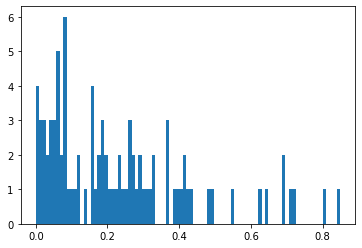

In [10]:
plt.hist(dataNS2['SumGreenArea'], bins = 89)
plt.show() 